# Test tsfresh

In [1]:
from tsfresh.examples.robot_execution_failures import download_robot_execution_failures, \
    load_robot_execution_failures
timeseries, y = load_robot_execution_failures()

In [2]:
print(timeseries.head())

   id  time  F_x  F_y  F_z  T_x  T_y  T_z
0   1     0   -1   -1   63   -3   -1    0
1   1     1    0    0   62   -3   -1    0
2   1     2   -1   -1   61   -3    0    0
3   1     3   -1   -1   63   -2   -1    0
4   1     4   -1   -1   63   -3   -1    0


In [3]:
import matplotlib.pyplot as plt
timeseries[timeseries['id'] == 3].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

<Figure size 1000x1000 with 8 Axes>

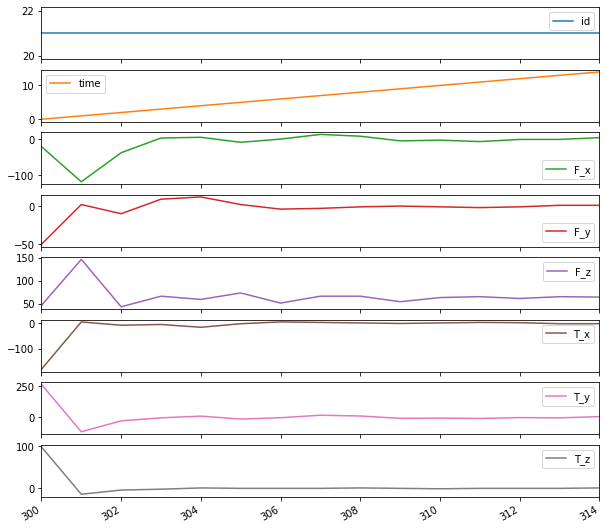

In [4]:
timeseries[timeseries['id'] == 21].plot(subplots=True, sharex=True, figsize=(10,10))
plt.show()

In [5]:
from tsfresh import extract_features
extracted_features = extract_features(timeseries, column_id="id", column_sort="time")

Feature Extraction: 100%|██████████| 10/10 [00:17<00:00,  1.71s/it]


In [9]:
extracted_features

variable,F_x__abs_energy,F_x__absolute_sum_of_changes,"F_x__agg_autocorrelation__f_agg_""mean""__maxlag_40","F_x__agg_autocorrelation__f_agg_""median""__maxlag_40","F_x__agg_autocorrelation__f_agg_""var""__maxlag_40","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""intercept""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""rvalue""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""slope""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_10__attr_""stderr""","F_x__agg_linear_trend__f_agg_""max""__chunk_len_50__attr_""intercept""",...,T_z__symmetry_looking__r_0.9,T_z__symmetry_looking__r_0.9500000000000001,T_z__time_reversal_asymmetry_statistic__lag_1,T_z__time_reversal_asymmetry_statistic__lag_2,T_z__time_reversal_asymmetry_statistic__lag_3,T_z__value_count__value_-1,T_z__value_count__value_0,T_z__value_count__value_1,T_z__variance,T_z__variance_larger_than_standard_deviation
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,2.0,-0.106351,-7.206633e-02,0.016879,0.0,-1.0,-1.0,0.0,NaN,...,0.0,0.0,0.000000,0.000000,0.000000,0.0,15.0,0.0,0.000000,0.0
2,25.0,14.0,-0.039098,-4.935275e-02,0.088790,0.0,0.0,0.0,0.0,NaN,...,1.0,1.0,0.000000,0.000000,0.000000,4.0,11.0,0.0,0.195556,0.0
3,12.0,10.0,-0.029815,2.602085e-17,0.105435,1.0,-1.0,-2.0,0.0,NaN,...,1.0,1.0,0.000000,-0.090909,0.000000,4.0,11.0,0.0,0.195556,0.0
4,16.0,17.0,-0.049773,-6.417112e-02,0.143580,1.0,-1.0,-1.0,0.0,NaN,...,1.0,1.0,0.000000,-0.181818,0.000000,6.0,8.0,1.0,0.355556,0.0
5,17.0,13.0,-0.061467,-5.172414e-02,0.052642,2.0,-1.0,-2.0,0.0,NaN,...,1.0,1.0,-0.076923,-0.090909,-0.222222,4.0,9.0,2.0,0.382222,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,96833.0,100.0,-0.435813,-8.343714e-01,0.538354,-25.0,-1.0,-77.0,0.0,NaN,...,1.0,1.0,-1254.846154,-3182.363636,-6043.333333,1.0,1.0,0.0,93.315556,1.0
85,1683.0,19.0,-0.599870,-4.380362e-01,0.991429,12.0,1.0,7.0,0.0,NaN,...,1.0,1.0,-34.846154,-57.545455,-84.000000,1.0,1.0,0.0,4.648889,1.0
86,83497.0,127.0,-0.603352,-4.802260e-01,0.994691,70.0,1.0,78.0,0.0,NaN,...,1.0,1.0,81.538462,141.000000,280.888889,0.0,0.0,1.0,29.840000,1.0


In [10]:
from tsfresh import select_features
from tsfresh.utilities.dataframe_functions import impute

impute(extracted_features)
features_filtered = select_features(extracted_features, y)

 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [11]:
from tsfresh import extract_relevant_features

features_filtered_direct = extract_relevant_features(timeseries, y,
                                                     column_id='id', column_sort='time')

Feature Extraction: 100%|██████████| 10/10 [00:20<00:00,  2.09s/it]
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"rvalue"'
 'F_x__agg_linear_trend__f_agg_"max"__chunk_len_50__attr_"slope"' ...
 'T_z__fft_coefficient__coeff_9__attr_"imag"'
 'T_z__fft_coefficient__coeff_9__attr_"real"'
 'T_z__spkt_welch_density__coeff_8'] did not have any finite values. Filling with zeros.


In [12]:
features_filtered_direct

variable,F_x__value_count__value_-1,F_x__abs_energy,F_x__range_count__max_1__min_-1,F_y__abs_energy,T_y__variance,T_y__standard_deviation,"F_x__fft_coefficient__coeff_1__attr_""abs""","T_y__fft_coefficient__coeff_1__attr_""abs""",T_y__abs_energy,F_z__standard_deviation,...,"T_x__change_quantiles__f_agg_""var""__isabs_True__qh_0.2__ql_0.0","F_z__change_quantiles__f_agg_""mean""__isabs_True__qh_1.0__ql_0.8",T_x__quantile__q_0.1,F_y__has_duplicate_max,"F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_13__w_2","F_y__cwt_coefficients__widths_(2, 5, 10, 20)__coeff_14__w_5",T_y__quantile__q_0.1,F_z__time_reversal_asymmetry_statistic__lag_1,F_x__quantile__q_0.2,F_y__quantile__q_0.7
id,,,,,,,,,,,,,,,,,,,,,
1,14.0,14.0,15.0,13.0,0.222222,0.471405,1.000000,1.165352,10.0,1.203698,...,0.000000,0.0,-3.0,1.0,-0.310265,-0.751682,-1.0,-5.960000e+02,-1.0,-1.0
2,7.0,25.0,13.0,76.0,4.222222,2.054805,0.624118,6.020261,90.0,4.333846,...,0.000000,1.0,-9.2,1.0,-0.202951,0.057818,-3.6,-6.803846e+02,-1.0,-1.0
3,11.0,12.0,14.0,40.0,3.128889,1.768867,2.203858,8.235442,103.0,4.616877,...,0.000000,3.0,-6.6,0.0,0.539121,0.912474,-4.0,-6.170000e+02,-1.0,0.0
4,5.0,16.0,10.0,60.0,7.128889,2.669998,0.844394,12.067855,124.0,3.833188,...,0.000000,0.0,-9.0,0.0,-2.641390,-0.609735,-4.6,3.426308e+03,-1.0,1.0
5,9.0,17.0,13.0,46.0,4.160000,2.039608,2.730599,6.445330,180.0,4.841487,...,0.000000,0.0,-9.6,0.0,0.591927,0.072771,-5.0,-2.609000e+03,-1.0,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,0.0,96833.0,0.0,42780.0,1563.528889,39.541483,359.248162,309.190088,171261.0,291.988082,...,64.000000,46.0,203.2,0.0,38.559593,71.641254,36.4,-7.700628e+07,-105.0,66.8
85,0.0,1683.0,0.0,1523.0,14.755556,3.841296,36.770027,26.631007,503.0,14.501494,...,4.666667,4.5,-41.6,0.0,14.429645,16.349699,1.0,-1.050785e+04,5.8,10.6
86,0.0,83497.0,0.0,21064.0,2788.595556,52.807154,312.044052,429.697740,118013.0,121.420189,...,0.250000,7.0,-84.8,0.0,60.760842,71.095480,19.6,-5.544922e+06,30.4,38.4


[[ 2.94805195e+00  5.96949351e+03  4.53246753e+00 ... -3.31439879e+06
  -3.60000000e+00  8.34285714e+00]
 [ 2.00000000e-01  1.97112700e+05  2.00000000e-01 ... -7.29879854e+07
  -2.53000000e+01  3.96000000e+01]
 [ 0.00000000e+00  9.22696000e+05  0.00000000e+00 ...  7.94951369e+07
  -2.50000000e+02  1.94800000e+02]]


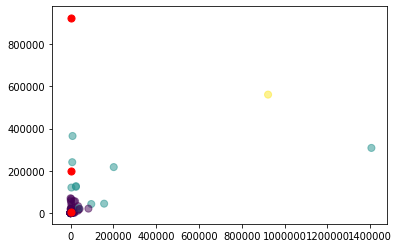

In [13]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3).fit(features_filtered_direct)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(features_filtered_direct["F_x__abs_energy"],features_filtered_direct["F_y__abs_energy"], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)